In [113]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#loading in data
BASEBALL_PATH="/Users/justinkoehn/Downloads"
def load_baseball_data(baseball_path=BASEBALL_PATH):
    csv_path = os.path.join(baseball_path, "baseballprojectdata.csv")
    return pd.read_csv(csv_path)

baseball=load_baseball_data()

In [114]:
#loading in Mets data

def load_test_data(baseball_path=BASEBALL_PATH):
    csv_path = os.path.join(baseball_path, "metsstats.csv")
    return pd.read_csv(csv_path)
mets=load_test_data()

In [115]:
#first five rows of data frame

baseball.head()

,player_age,slg_percent_2019,exit_velocity_avg,launch_angle_avg,barrels
0,31,0.503,91.3,12.2,36
1,28,0.437,86.5,11.3,21
2,21,0.500,86.3,15.5,25
3,28,0.550,86.3,9.5,27
4,25,0.468,90.2,8.7,27


In [116]:
#first five rows of Mets data

mets.head()

,last_name,first_name,year,player_age,exit_velocity_avg,launch_angle_avg,barrels
0,Cano,Robinson,2019,37,90.8,7.3,24
1,Ramos,Wilson,2019,32,90.0,0.0,19
2,Davis,J.D.,2019,26,91.4,10.6,36
3,Nimmo,Brandon,2019,26,88.1,11.4,9
4,Nido,Tomas,2019,25,86.4,6.2,5


In [117]:
#summary of data

baseball.describe()

,player_age,slg_percent_2019,exit_velocity_avg,launch_angle_avg,barrels
count,89.000000,89.000000,89.000000,89.000000,89.000000
mean,28.382022,0.487888,89.010112,12.451685,34.280899
std,3.439429,0.070736,2.096428,4.649636,14.211862
min,21.000000,0.321000,84.000000,-1.200000,4.000000
25%,26.000000,0.436000,87.300000,9.400000,24.000000
50%,28.000000,0.494000,89.100000,12.900000,34.000000
75%,31.000000,0.531000,90.200000,15.500000,44.000000
max,38.000000,0.671000,93.900000,22.400000,70.000000


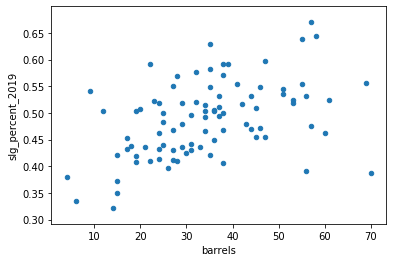

In [118]:
#scatter plot of barrels and slugging percentage

baseball.plot(x="barrels",y="slg_percent_2019",kind="scatter")

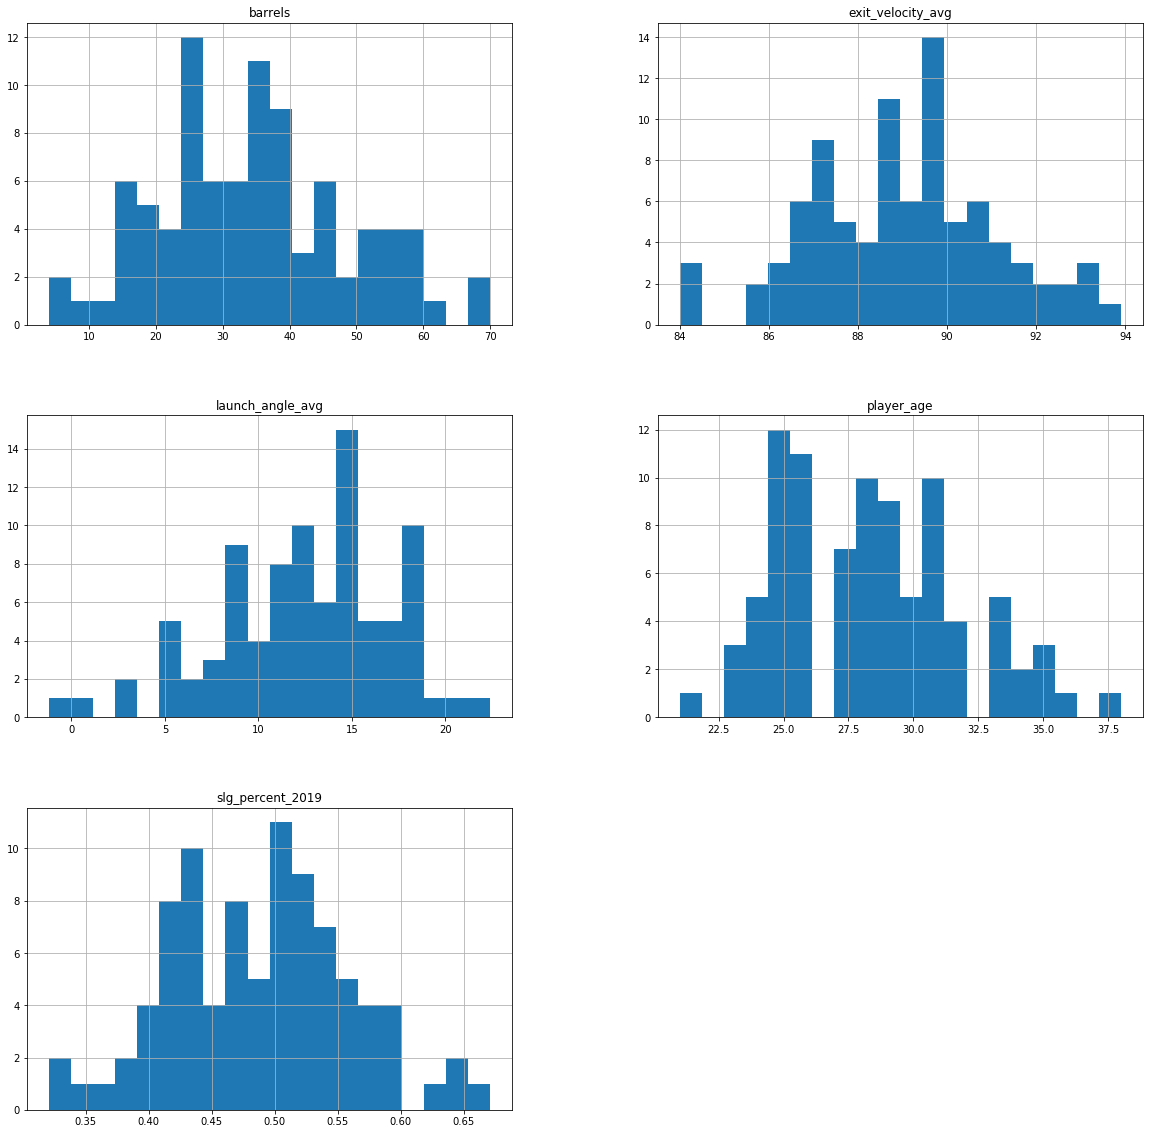

In [119]:
#histogram of attributes (shows frequencies)

baseball.hist(bins=20,figsize=(20,20))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2172ff60>,
      dtype=object)

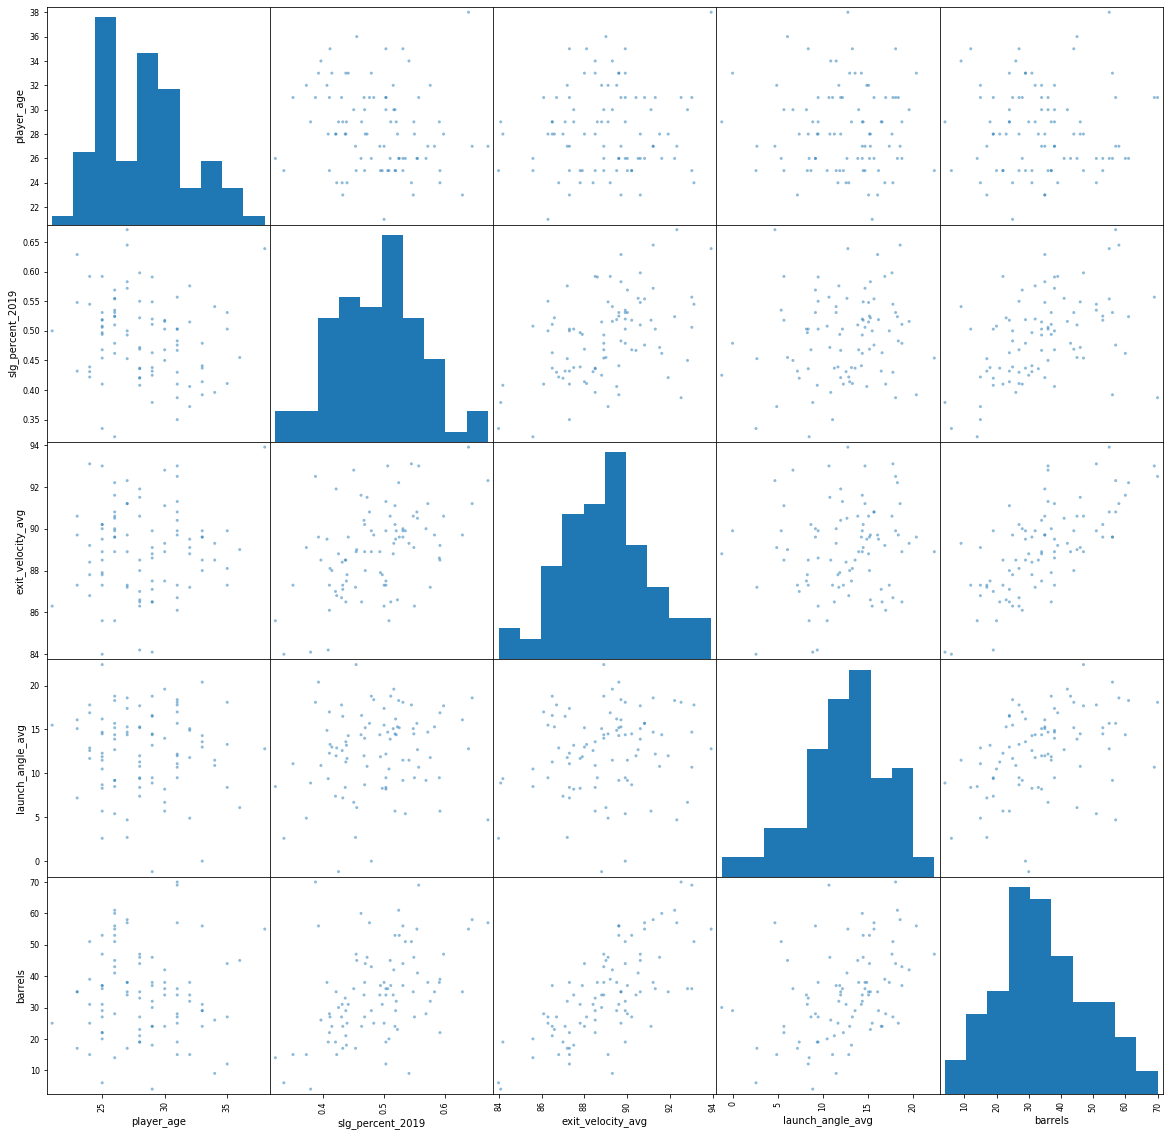

In [120]:
#correlation between attributes
from pandas.plotting import scatter_matrix


scatter_matrix(baseball, figsize=(20,20))

In [121]:
#numerical correlation between slugging percentage and attributes

corr_matrix = baseball.corr()
corr_matrix["slg_percent_2019"].sort_values(ascending=False)

slg_percent_2019     1.000000
exit_velocity_avg    0.470766
barrels              0.448330
launch_angle_avg     0.161010
player_age          -0.159656
Name: slg_percent_2019, dtype: float64

In [122]:
#1:import packages and load in data as data frame
#2:View 5 row sample of data frame
#3:Create summary statistics 
#4:Create plots
#4a:scatter plot
#4b:histogram
#5:Create correlation scatter plot between attributes
#6:Create numerical correlation between slugging percentage and attributes

In [123]:
#seperating x values from y labels
baseball_playerdata=baseball.drop("slg_percent_2019",axis=1)
baseball_playerdata.head()
baseball_slug=baseball["slg_percent_2019"]
baseball_slug.head()

0    0.503
1    0.437
2    0.500
3    0.550
4    0.468
Name: slg_percent_2019, dtype: float64

In [126]:
#using SCI-KIT
#pre-processing data 
#DEFINING pipeline
#Input: data frame WITHOUT y values
#Output: processed array WITHOUT y values
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs=list(baseball_playerdata)

full_pipeline = Pipeline([
             ('selector', DataFrameSelector(num_attribs)),
             ('imputer', SimpleImputer(strategy="median")),
             ('std_scaler', StandardScaler())
    ,
])



 


In [127]:
#Calling pipeline to pre-process data
baseball_prepared= full_pipeline.fit_transform(baseball_playerdata)

In [128]:
baseball_prepared.shape

(89, 4)

In [129]:
baseball_prepared

array([[ 0.76547887,  1.09846923, -0.05443682,  0.12164776],
       [-0.11170078, -1.204112  , -0.24909703, -0.93978857],
       [-2.1584533 , -1.30005289,  0.65931732, -0.65673888],
       [-0.11170078, -1.30005289, -0.63841747, -0.51521404],
       [-0.98888043,  0.57079436, -0.81144878, -0.51521404],
       [-0.98888043, -1.63584598, -0.42212834, -1.01055099],
       [-0.404094  ,  0.33094215,  0.61605949,  0.05088534],
       [-0.69648722,  0.28297171, -0.70330421,  1.5368962 ],
       [-0.69648722,  0.47485348, -0.70330421, -0.44445162],
       [-1.57366687,  0.33094215,  0.7890908 ,  0.05088534],
       [-1.28127365, -0.2926736 ,  0.03207884, -0.23216435],
       [-0.69648722,  1.53020321,  1.26492689,  1.89070831],
       [ 1.05787209, -0.86831891, -0.14095247, -0.16140193],
       [-0.69648722,  0.71470569,  0.05370775,  0.47545987],
       [-0.11170078,  1.38629188, -0.09769464,  0.05088534],
       [ 0.76547887,  0.42688304, -0.63841747, -1.08131342],
       [-1.28127365,  0.

In [131]:
#APPLYING THE LINEAR REGRESSION MODEL
#STORES PARAMETERS OF THE MODEL

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(baseball_prepared,baseball_slug)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
#TESTING HOW WELL THE LINEAR REGRESSION MODEL DID

testdata=baseball_playerdata.iloc[5:10]
standardtestdata= full_pipeline.fit_transform(testdata)
print("Predictions:\t", lin_reg.predict(standardtestdata))
realslug=baseball_slug.iloc[5:10]
print("Labels:\t\t", list(realslug))

Predictions:	 [0.42541712 0.48554095 0.51465925 0.48894907 0.52487181]
Labels:		 [0.508, 0.583, 0.531, 0.569, 0.629]


In [133]:
#Root Mean Square Error of Linear Regression Model using the entire dataset

import numpy as np
from sklearn.metrics import mean_squared_error

baseball_predictions = lin_reg.predict(baseball_prepared)
lin_mse = mean_squared_error(baseball_slug,baseball_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.05953720830788471

In [134]:
# Mean Error
import statistics 

meanerror=statistics.mean(baseball_slug-baseball_predictions)
print(meanerror)

4.86502224273945e-17


In [135]:
#mets test data
#load in mets data
#process and standardize
#predict output

In [136]:
#Calling pipeline to pre-process Mets data
mets_prepared= full_pipeline.fit_transform(mets)

In [137]:
mets_prepared

array([[ 2.37582223,  1.01232286, -0.53811701, -0.20109992],
       [ 1.11803399,  0.47241733, -2.12351107, -0.47532708],
       [-0.3913119 ,  1.417252  ,  0.17856798,  0.45704527],
       [-0.3913119 , -0.80985829,  0.35230979, -1.02378139],
       [-0.64286954, -1.95715753, -0.77701201, -1.24316312],
       [-0.64286954,  0.87734648,  1.0907125 ,  2.10240822],
       [-0.3913119 , -0.33744095,  1.28617205,  1.11519045],
       [-0.89442719, -0.06748819, -0.21235111, -0.36563621],
       [-0.13975425, -0.60739372,  0.74322887, -0.36563621]])

In [93]:
#predicting 2020 slugging percentages for 9 Mets Players based on 2019 Statcast attributes
#order of predictions: Cano, Ramos, Davis, Nimmo, Nido, Alonso, Conforto, Rosario, McNeil
metsdata=mets_prepared
standardtestdata= full_pipeline.fit_transform(testdata)
print("Predictions:\t", lin_reg.predict(mets_prepared))


Predictions:	 [0.47787491 0.47530006 0.53426475 0.45985912 0.43046636 0.54782976
 0.50164122 0.49281285 0.47093974]
